In [4]:
# data => letterdata.csv
# location => https://mitu.co.in/dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('letterdata.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [10]:
df.shape

(20000, 17)

In [14]:
df.isnull().sum().sum()

0

#### separate input and output

In [17]:
x = df.drop('letter', axis = 1)

y = df['letter']

In [23]:
y;

In [21]:
np.unique(y)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

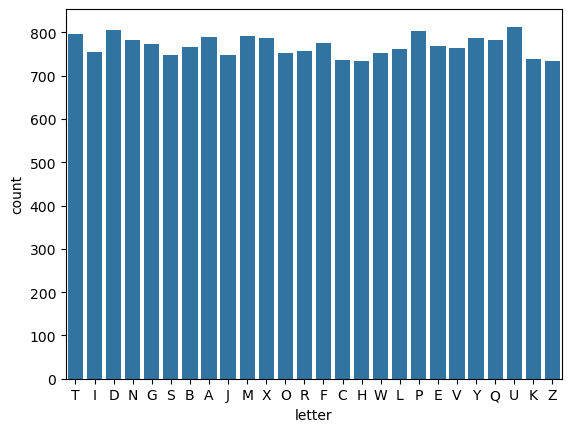

In [25]:
sns.countplot(x = y);

In [27]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

#### cross validation

In [30]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.20)

In [36]:
x_train.shape, y_train.shape

((16000, 16), (16000,))

#### build the model

In [39]:
from sklearn.svm import SVC

In [79]:
svc = SVC(kernel= 'poly')

In [81]:
svc.fit(x_train, y_train)

SVC(kernel='poly')

#### Evaluation

In [83]:
y_pred = svc.predict(x_test)

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [85]:
import matplotlib.pyplot as plt

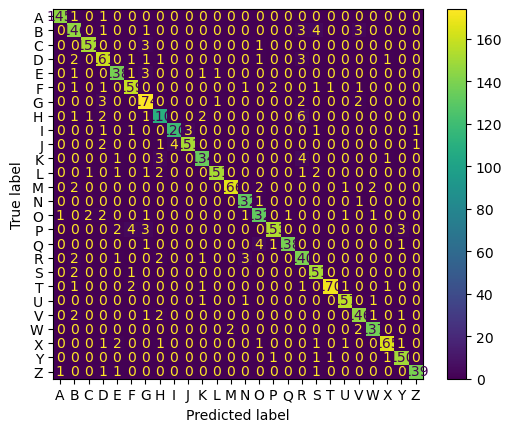

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       0.88    

In [88]:
accuracy_score(y_test, y_pred)

0.95425

In [89]:
# linear => 0.8655
# rbf => 0.93
# poly => 0.95
# sigmoid => 0.03

In [101]:
# predict on unseen data

In [103]:
new1 = [[2, 8, 3, 6, 1, 8, 13, 9, 6, 9, 12, 8, 0, 8, 4, 8]]
new2 = [[1, 4, 7, 3, 9, 8, 14, 4, 6, 6, 12, 8, 6, 3, 1, 5]]
new3 = [[12, 4, 13, 6, 10, 2, 3, 10, 6, 8, 9, 11, 7, 8, 4, 8]]

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
svc.predict(new1)

array(['T'], dtype=object)

In [117]:
svc.predict(new2)

array(['M'], dtype=object)

In [119]:
svc.predict(new3)

array(['W'], dtype=object)